# Linear Regression

Generic Formula: ```y = mx + b```

Full detailed notes are in ```Linear_Regression/notebook file```

In [12]:
# importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [39]:
x = np.random.randint(0, 50, 100)
y = np.random.randint(0, 20, 100)

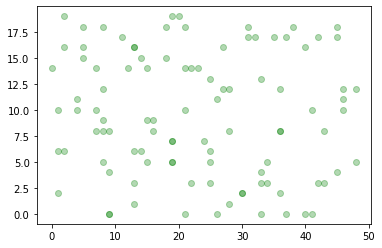

In [40]:
plt.scatter(x, y, alpha=0.3, facecolor='green')

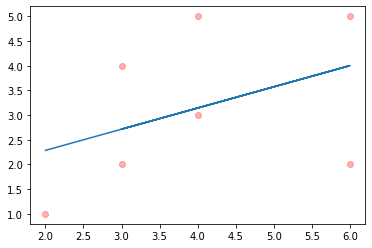

In [45]:
y = np.array([1,3,2,4,5,5,2])
x = np.array([2,4,6,3,6,4,3])

plt.scatter(x, y, alpha=0.3, facecolor='red')


# applying linear regression
# we need a line that cross/intersect all the points into two equal halves
# m = slope; b = intercept
m, b = np.polyfit(x, y, 1)

y = m * x + b
plt.plot(x, y)
plt.show()

Coefficient are the best labels/features that helped the model in prediction

#### Real life datasets Example

Predicting the Price of houses in USA based on various attributes

In [13]:
df = pd.read_csv("Linear_Regression/USA_Housing.csv")
df.head(10)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
5,80175.754159,4.988408,6.104512,4.04,26748.428425,1.068138e+06,"06039 Jennifer Islands Apt. 443\nTracyport, KS..."
6,64698.463428,6.025336,8.147760,3.41,60828.249085,1.502056e+06,"4759 Daniel Shoals Suite 442\nNguyenburgh, CO ..."
7,78394.339278,6.989780,6.620478,2.42,36516.358972,1.573937e+06,"972 Joyce Viaduct\nLake William, TN 17778-6483"
8,59927.660813,5.362126,6.393121,2.30,29387.396003,7.988695e+05,USS Gilbert\nFPO AA 20957
9,81885.927184,4.423672,8.167688,6.10,40149.965749,1.545155e+06,Unit 9446 Box 0958\nDPO AE 97025


In [14]:
# since, 'Address' is not required for predicting the Pricse. So, we can drop the column
df.drop(columns=['Address'],inplace=True)

In [15]:
# dataframe.info() provides all the information regarding the DataTypes and Null objects (if any) etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.4 KB


In [16]:
# will get you some common data, like MEAN, MIN, MAX, Std.Dev etc.
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [17]:
df.count()

Avg. Area Income                5000
Avg. Area House Age             5000
Avg. Area Number of Rooms       5000
Avg. Area Number of Bedrooms    5000
Area Population                 5000
Price                           5000
dtype: int64

In [18]:
# getting NaN, null values
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: int64

In [19]:
# if values were found that are NaN or null
df.fillna(0, inplace=True)

In [20]:
# getting the Shpae of data
df.shape

(5000, 6)

In [23]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [29]:
df['Price'].head().unique()

array([1059033.55787012, 1505890.91484695, 1058987.98787608,
       1260616.80662945,  630943.48933854])

# Exploratory Data Analysis

Various plots to check or visualize the data

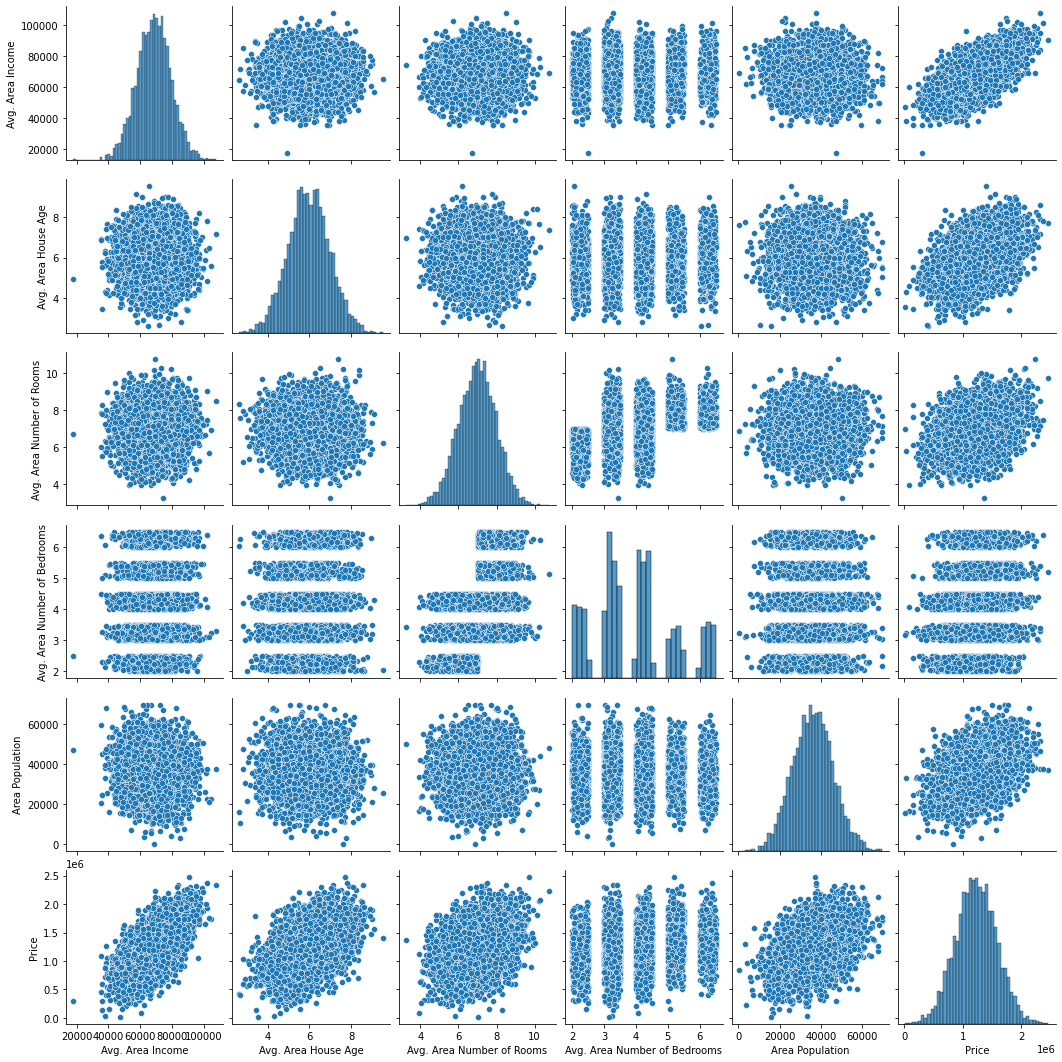

In [62]:
sns.pairplot(df)

c:\users\hamza\appdata\local\programs\python\python36-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Avg. Area Income', ylabel='Density'>

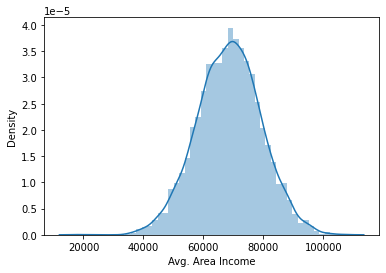

In [35]:
sns.distplot(df['Avg. Area Income'])

<AxesSubplot:>

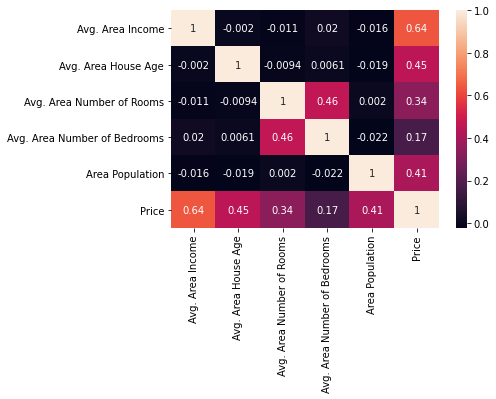

In [93]:
corelation = df.corr()
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True)

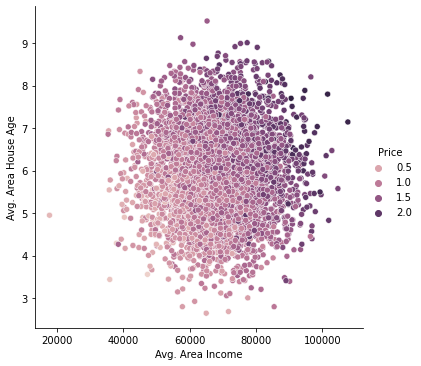

In [33]:
# it tells the relation between x & y and their effect on 'hue'.
sns.relplot(x = 'Avg. Area Income', y = 'Avg. Area House Age', hue = "Price", data=df)

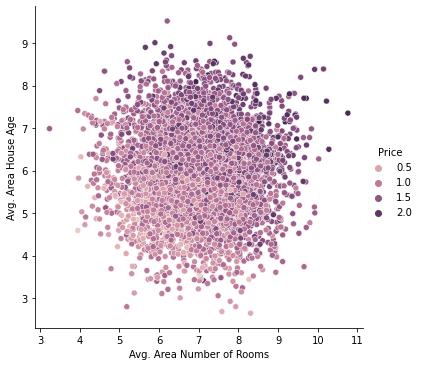

In [36]:
sns.relplot(x = 'Avg. Area Number of Rooms', y = 'Avg. Area House Age', hue = "Price", data=df)

# Training a Linear Regression Model
The process is same as for other model training. That is, getting data, then splitting it into ```train``` and ```test``` features.

In [53]:
# getting features & target

# features/labels
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]

# target
Y = df['Price']

In [55]:
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [56]:
Y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

## Train & Test Split

In [59]:
# import train_test_split
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

In [68]:
X_train.shape

(4000, 5)

In [69]:
X_test.shape

(1000, 5)

### Training a Linear Regression Model

In [57]:
# import linear regression model
from sklearn.linear_model import LinearRegression

In [58]:
# making model
lm = LinearRegression()

In [70]:
# train the model 'fit'
lm.fit(X_train, Y_train)

LinearRegression()

## Model Evaluation

In [73]:
# getting intercept from LinearRegression Model
lm.intercept_

-2640441.399782456

In [75]:
# Co-efficient DataFrame
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,21.566696
Avg. Area House Age,165453.042478
Avg. Area Number of Rooms,120499.839093
Avg. Area Number of Bedrooms,1999.785336
Area Population,15.340604


Understanding the above data:

- Keeping other units same, 1 Unit increase in `Avg. Area Income` will increase the cost by ```$21.56```
- Keeping other units same, 1 Unit increase in ```Avg. Area House Age``` will increase the cost by ```$165453.042```
- Similarly, for others. But you have to keep the cost fixed while considering one factor

## Prediction from our Model

In [76]:
# this is specific values from our features and we will also test this to see what our model predicts the price
x = [[79248.642455,6.002900,6.730821,3.09,40173.072174]]

In [79]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Values')

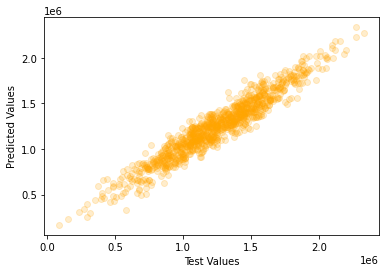

In [87]:
plt.scatter(Y_test, predictions, facecolor='orange', alpha=0.2)
plt.xlabel("Test Values")
plt.ylabel("Predicted Values")

c:\users\hamza\appdata\local\programs\python\python36-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

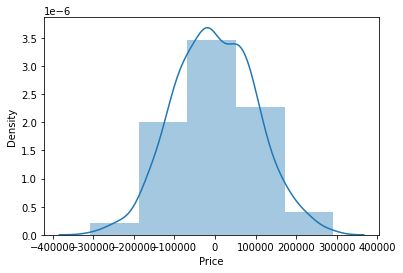

In [90]:
sns.distplot((Y_test-predictions), bins=5)

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

## Practise with other DataSets
We will be using datasets of Cars from `vega_datasets` and will be predicting `Acceleration` based on other values or features provided in the datasets

In [130]:
# datasets of cars
from vega_datasets import data

In [131]:
# getting/loading the data

In [132]:
data = data.cars()
data

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA
...,...,...,...,...,...,...,...,...,...
401,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,1982-01-01,USA
402,vw pickup,44.0,4,97.0,52.0,2130,24.6,1982-01-01,Europe
403,dodge rampage,32.0,4,135.0,84.0,2295,11.6,1982-01-01,USA
404,ford ranger,28.0,4,120.0,79.0,2625,18.6,1982-01-01,USA


In [133]:
data.columns

Index(['Name', 'Miles_per_Gallon', 'Cylinders', 'Displacement', 'Horsepower',
       'Weight_in_lbs', 'Acceleration', 'Year', 'Origin'],
      dtype='object')

In [134]:
# dropping the extra columns which are not needed here
data.drop(columns=['Name', 'Year', 'Origin'], inplace=True)

In [135]:
data.head()

,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration
0,18.0,8,307.0,130.0,3504,12.0
1,15.0,8,350.0,165.0,3693,11.5
2,18.0,8,318.0,150.0,3436,11.0
3,16.0,8,304.0,150.0,3433,12.0
4,17.0,8,302.0,140.0,3449,10.5


In [136]:
data.tail()

,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration
401,27.0,4,140.0,86.0,2790,15.6
402,44.0,4,97.0,52.0,2130,24.6
403,32.0,4,135.0,84.0,2295,11.6
404,28.0,4,120.0,79.0,2625,18.6
405,31.0,4,119.0,82.0,2720,19.4


In [137]:
data.describe()

,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration
count,398.000000,406.000000,406.000000,400.000000,406.000000,406.000000
mean,23.514573,5.475369,194.779557,105.082500,2979.413793,15.519704
std,7.815984,1.712160,104.922458,38.768779,847.004328,2.803359
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000
25%,17.500000,4.000000,105.000000,75.750000,2226.500000,13.700000
50%,23.000000,4.000000,151.000000,95.000000,2822.500000,15.500000
75%,29.000000,8.000000,302.000000,130.000000,3618.250000,17.175000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000


In [138]:
data.Acceleration.dtype

dtype('float64')

In [139]:
data.Acceleration.head().unique()

array([12. , 11.5, 11. , 10.5])

In [140]:
# cleaning the data

In [141]:
data.isnull().sum()

Miles_per_Gallon    8
Cylinders           0
Displacement        0
Horsepower          6
Weight_in_lbs       0
Acceleration        0
dtype: int64

In [142]:
data.shape

(406, 6)

In [143]:
# filling the NaN values
data.fillna(0, inplace=True)

In [144]:
data.isnull().sum()

Miles_per_Gallon    0
Cylinders           0
Displacement        0
Horsepower          0
Weight_in_lbs       0
Acceleration        0
dtype: int64

In [145]:
# creating and training the model

In [148]:
# getting features and target
features = data[['Miles_per_Gallon', 'Cylinders', 'Displacement', 'Horsepower', 'Weight_in_lbs']]
features

,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs
0,18.0,8,307.0,130.0,3504
1,15.0,8,350.0,165.0,3693
2,18.0,8,318.0,150.0,3436
3,16.0,8,304.0,150.0,3433
4,17.0,8,302.0,140.0,3449
...,...,...,...,...,...
401,27.0,4,140.0,86.0,2790
402,44.0,4,97.0,52.0,2130
403,32.0,4,135.0,84.0,2295
404,28.0,4,120.0,79.0,2625


In [151]:
target = data[['Acceleration']]
target

,Acceleration
0,12.0
1,11.5
2,11.0
3,12.0
4,10.5
...,...
401,15.6
402,24.6
403,11.6
404,18.6


In [153]:
# spliting the data into test and train sets
from sklearn.model_selection import train_test_split

In [158]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2)

In [159]:
features_test.shape

(82, 5)

In [160]:
features_train.shape

(324, 5)

In [161]:
# training the model
from sklearn.linear_model import LinearRegression

In [162]:
lm = LinearRegression()

In [163]:
lm.fit(features_train, target_train)

LinearRegression()

In [164]:
predictions = lm.predict(features_test)

In [166]:
target_test

,Acceleration
115,19.0
300,14.0
128,11.0
392,15.7
56,14.0
...,...
20,15.0
116,19.5
268,15.1
83,14.5


In [165]:
predictions

array([[15.94233083],
       [16.15200875],
       [11.80769517],
       [16.51192281],
       [15.6641702 ],
       [16.11410699],
       [17.26829325],
       [12.84114986],
       [16.40393502],
       [15.06463873],
       [14.09806372],
       [17.72276024],
       [16.779729  ],
       [16.41635749],
       [ 9.78558898],
       [17.31145654],
       [16.22926702],
       [14.86332382],
       [17.15710064],
       [16.51386387],
       [16.64161988],
       [15.9741003 ],
       [16.77204635],
       [16.68540109],
       [12.35947442],
       [15.22475174],
       [14.4676108 ],
       [15.10834959],
       [14.31012706],
       [12.39792313],
       [15.74056404],
       [15.31791139],
       [16.5471286 ],
       [12.46256606],
       [14.28792428],
       [15.37236749],
       [16.2683586 ],
       [17.16508169],
       [16.24557679],
       [14.99249534],
       [15.75781555],
       [15.0721755 ],
       [16.12986111],
       [16.54946849],
       [17.44793295],
       [17

Text(0.5, 1.0, 'Predicting the Acceleration')

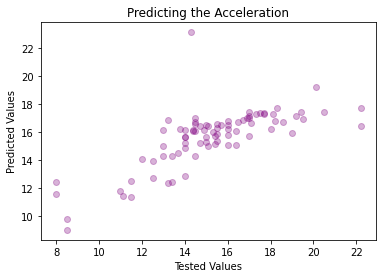

In [172]:
plt.scatter(target_test, predictions, facecolor="purple", alpha=0.3)
plt.xlabel("Tested Values")
plt.ylabel("Predicted Values")
plt.title("Predicting the Acceleration")

In [174]:
# making the model a package for deployment
import pickle
with open('car_acceleration_predictor.pkl', 'wb') as f:
    pickle.dump(lm, f)